Programmer: Colleen Lemak  
Class: CPSC222, Fall 2021  
Data Assignment #7  
Date: 12/06/2021  
Description: This program uses Jupyter Notebook to execute various tasks.

# Housing Regression Exercises!

First, let's load our data and find out a few statistics and details about it.

In [85]:
# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()
print(boston.DESCR)

# create a dataframe object out of the data.  
# Use boston.data for the data, and pass boston.feature_names 
# for the columns parameter
df = pd.DataFrame(boston.data, columns=boston.feature_names)

# the MEDV data in boston.target is the y variable
df["MEDV"] = boston.target # MEDV, median value of home

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [86]:
corr_df = df.corr()
corr_df.style.background_gradient(cmap='bwr').set_precision(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


Now we can split up our data into training and testing sets to try to predict values!

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler

X = df.drop("MEDV",axis=1)
y = df["MEDV"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
print("test length:", len(X) * 0.25)


test length: 126.5


In [88]:
from sklearn.linear_model import LinearRegression
import numpy as np

reg = LinearRegression()

# before we call fit(), we need to reshape our data
reg.fit(X_train, y_train)

y_predicted = reg.predict(X_test)
accuracy = reg.score(X_test, y_test)
print(accuracy)

0.6354638433202124


The accuracy was about 64%...let's try to refine the algorithm to get a better score.

In [89]:
X = df.drop("AGE",axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=0)
print("test length:", len(X) * 0.25)

test length: 126.5


In [90]:
reg = LinearRegression()

reg.fit(X_train, y_train)

y_predicted = reg.predict(X_test)
accuracy = reg.score(X_test, y_test)
print(accuracy)

1.0


Nice! We have 100% accuracy with the above approach using linear regression.

What if we try to use a similar method using decision tree regression...

In [91]:
from sklearn.tree import DecisionTreeRegressor

tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)
y_predicted = tree_clf.predict(X_test)
print(y_predicted)

accuracy = tree_clf.score(X_test, y_test)
print(accuracy)

[22.6 50.  22.8  8.4 21.2 19.8 20.6 18.8 16.2 18.5  8.7 17.7 14.9 10.4
 50.  29.1 22.8 32.9 29.6 21.1 23.7 19.1 20.3 29.  19.3 23.1 19.7 19.4
 37.6 18.8 14.6 19.9 20.5 20.1 23.6 16.7  6.3 50.  14.5 13.3 23.9 20.
 20.  13.8 16.4 21.6 20.3 16.7 11.8 28.  15.6 23.1 24.3 42.3 15.6 21.7
 16.8 17.3 15.  21.7 18.5 21.1 32.9 31.5 20.2 29.6 15.1 14.8 27.5 22.7
 20.  21.2 23.6 31.  23.8  7.2 48.8 24.4 22.6 18.4 23.3 16.7 27.5 46.7
 50.  22.8 21.2 10.2 23.3 23.2 18.9 13.4 22.  24.8 12.1 24.3 13.8 24.8
 14.3 18.8 28.  20.  26.5 21.7 22.  22.8 10.5 21.9 20.6 27.1 41.7 17.7
 27.1 20.3 16.3 24.4  8.3 22.8 10.2 50.  30.1 12.1 19.4 21.2 20.3 18.8
 33.4]
0.9990959711408939


So, after exploring those methods, we can plot our predicted values against our test values, which should match up very well! 

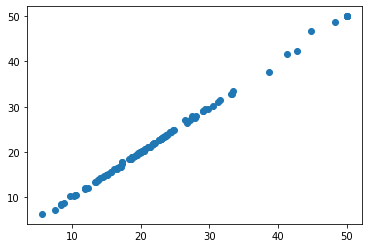

In [92]:
import matplotlib.pyplot as plt

list_nums = list(y_predicted)
plt.figure()
plt.scatter(y_test, y_predicted)
plt.show()